# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.decomposition import PCA

# Loading data

In [2]:
data_red_wine = pd.read_csv('https://raw.githubusercontent.com/AlexHappyCode/wine_quality_project_team_4/main/wine_quality_dataset/winequality-red.csv', ';')
data_white_wine = pd.read_csv('https://raw.githubusercontent.com/AlexHappyCode/wine_quality_project_team_4/main/wine_quality_dataset/winequality-white.csv', ';')
both_frames = [data_red_wine, data_white_wine]

/var/folders/gy/6hfj4mp13fv_nxb4csgpjcs40000gn/T/ipykernel_23684/1443193562.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  data_red_wine = pd.read_csv('https://raw.githubusercontent.com/AlexHappyCode/wine_quality_project_team_4/main/wine_quality_dataset/winequality-red.csv', ';')
/var/folders/gy/6hfj4mp13fv_nxb4csgpjcs40000gn/T/ipykernel_23684/1443193562.py:2: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  data_white_wine = pd.read_csv('https://raw.githubusercontent.com/AlexHappyCode/wine_quality_project_team_4/main/wine_quality_dataset/winequality-white.csv', ';')


## Merging the datasets together

In [3]:
data_red_and_wine = pd.concat(both_frames, ignore_index=True)

In [4]:
print(data_white_wine.shape)
print(data_red_wine.shape)
print(data_red_and_wine.shape)

(4898, 12)
(1599, 12)
(6497, 12)


# Binning the qualities
The 'quality' feature in this data_red_and_wineframe is numerical value but we need to make a categorical variable out of it.

Hence, we bin 1-3 as poor, 4-6 as good and 7-9 as excellent

In [5]:
data_red_and_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [6]:
data_red_and_wine.shape

(6497, 12)

In [7]:
data_red_and_wine['label'] = np.nan
data_red_and_wine['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [8]:
for i in range(data_red_and_wine.shape[0]):
    data_red_and_wine['quality'][i]

In [9]:
for i in range(len(data_red_and_wine)):
    if data_red_and_wine['quality'][i] < 4:
        data_red_and_wine['label'][i] = 'Poor'
    elif data_red_and_wine['quality'][i] < 7 and data_red_and_wine['quality'][i] > 3:
        data_red_and_wine['label'][i] = 'Good'
    else:
        data_red_and_wine['label'][i] = 'Excellent'

/var/folders/gy/6hfj4mp13fv_nxb4csgpjcs40000gn/T/ipykernel_23684/2247064200.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_red_and_wine['label'][i] = 'Good'


In [10]:
y = data_red_and_wine['label']
X = data_red_and_wine.drop(['label'], axis=1)
y.value_counts()

Good         5190
Excellent    1277
Poor           30
Name: label, dtype: int64

# Correlation
Correlation among variables denotes how variables behave with respect to each other.

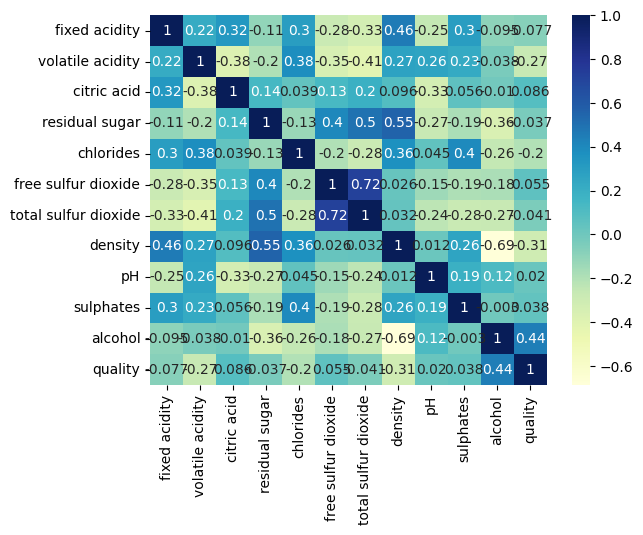

In [11]:
dataplot = sb.heatmap(X.corr(), cmap="YlGnBu", annot=True)

# Principle Component Analysis
Since we saw that there was correlation observed among a lot of variables in the data, we can say that not all variables might be necessary to cover the distribution of data.

Principle Component Analysis involves reducing the dimensions of a database while minimizing the information loss.
For detailed technical explanation
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

https://wires.onlinelibrary.wiley.com/doi/abs/10.1002/wics.101

https://www.youtube.com/watch?v=HMOI_lkzW08

In [12]:
X_pca = X

pca = PCA(n_components=7)
pca.fit(X_pca)

PCA(n_components=7)

# Explanation on "n_components"

This variable means the number of dimensions we want of the data at the end of PCA.

This parameter of PCA function is manually tunable. It means that it is not necessary that any one specific value is "best".

The more is n_components, the less will be the loss of information. Our goal should be to minimize the dimensions while also trying to minimize the information loss. This is a tradeoff, which we will better understand after this data is used to fit a model. Here, I have only arbitrarily set the value to 7. Hence the resulting data will be of 7 dimensions instead of the original 11

In [13]:
pca.components_

array([[-7.40794747e-03, -1.18432245e-03,  4.86867386e-04,
         4.10197243e-02, -1.68197676e-04,  2.30481538e-01,
         9.72166737e-01,  1.77246490e-06, -6.55520709e-04,
        -7.04339125e-04, -5.45180769e-03, -5.32679832e-04],
       [-5.37151136e-03, -7.86983127e-04, -2.47169465e-04,
         1.86280097e-02,  6.68445065e-05,  9.72618836e-01,
        -2.31394621e-01,  1.27799964e-06,  6.48013240e-04,
         3.46546062e-04,  2.87899807e-03,  9.15205691e-03],
       [ 2.38512534e-02,  9.04663220e-04,  1.92231722e-03,
         9.95215659e-01,  1.76598728e-04, -2.71252260e-02,
        -3.58535508e-02,  4.60800041e-04, -6.91136883e-03,
        -1.93636054e-03, -8.25958966e-02, -8.79199781e-03],
       [ 7.13391954e-01,  2.40023102e-02,  2.40290581e-02,
        -7.05007767e-02,  9.90529594e-03,  1.08118777e-02,
         2.26122774e-03,  1.43929562e-03, -2.76138928e-02,
         2.23568727e-02, -6.09807112e-01, -3.34064046e-01],
       [ 6.93896945e-01, -1.79724761e-02,  5.0975047

### Alexander Pena

# Library imports

In [14]:
import os
import warnings
from IPython import display
import yfinance as yf
import datetime as dt
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score 
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

# Dataset Characteristics

All the samples in the dataset are numeric

### Number of samples 

In [15]:
print('Number of samples:', data_red_and_wine.shape[0])

Number of samples: 6497


### Classification Split

In [16]:
print('Number of 0 labels: ', len(data_red_and_wine[data_red_and_wine.label==0]))
print('Number of 1 labels: ', len(data_red_and_wine[data_red_and_wine.label==1]))

Number of 0 labels:  0
Number of 1 labels:  0


# splitting data into features and labels
### Dropping the labels for our feature matrix

In [17]:
y = data_red_and_wine.iloc[:, data_red_and_wine.shape[1] - 1].values
x = data_red_and_wine.drop(['label'], axis=1)

# Split the data into trainning set and testing set
### Supervised Learning

In [18]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.25,
    #random_state=0
    shuffle=True
)

# Creating the Random Forest Classifier

In [19]:
model = RandomForestClassifier (
    n_estimators=500, # ntree
    max_features=6, # mtry
    bootstrap=True, # yes
    random_state=42, # for testing
    oob_score=True # need oob score
)

# Hyperparameter tuning

The hyperparameters in the random forest model are either used to increase the predictive power of the model or to make the model faster. 

# Cross Validation

| n_estimators      | number of trees in the forest 
|-------------------|:------------------------------
| max_depth         | maximum depth in a tree
| min_samples_split | minimum number of samples to allow a split in an internal node
| min_samples_leaf  | specifies the minimum number of samples required to be at a leaf node
| bootstrap         |Bootstrap=True (default): samples are drawn with replacement Bootstrap=False : samples are drawn without replacement
| random_state  | generated random numbers for the random forest.

In [20]:
grid_ranges = {
    'n_estimators': [500, 1000],
    'max_features': np.arange(1, 5, 1),
    'bootstrap': [True],
    #'random_state': [1, 2, 30, 42],
}
gscv = GridSearchCV(
    estimator=model,
    param_grid=grid_ranges,
    cv=3,
    n_jobs=-1,
    verbose=1,
)
gscv_fit = gscv.fit(x_train, y_train)
best_parameters = gscv_fit.best_params_
print(best_parameters)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
{'bootstrap': True, 'max_features': 4, 'n_estimators': 500}


# Recreate the Random Forest Model with the best found hyperparameters

In [21]:
model = RandomForestClassifier(
    n_estimators=best_parameters['n_estimators'],
    max_features=best_parameters['max_features'],
    bootstrap=best_parameters['bootstrap'],
    oob_score=True
)
model.fit(x_train, y_train)

RandomForestClassifier(max_features=4, n_estimators=500, oob_score=True)

# Now running the model on the test data

### Running model on entire testing data

In [22]:
predict = model.predict(x_test)

### Taking a single positive and negative sample

#### Negative Sample

In [23]:
index = 0 # index of sample to predict
single_sample = [x_test.iloc[index].to_numpy()]


In [24]:
%%time
with warnings.catch_warnings(record=True):
    single_predict = model.predict(single_sample)

CPU times: user 56 ms, sys: 3.61 ms, total: 59.6 ms
Wall time: 320 ms


In [25]:
print('predicted:', single_predict[0], ' actual', y_test[index])

predicted: Good  actual Good


#### Positive Sample

In [26]:
index = 1 # index of sample to predict
single_sample = [x_test.iloc[index].to_numpy()]

In [27]:
%%time
with warnings.catch_warnings(record=True):
    single_predict = model.predict(single_sample)

CPU times: user 49.9 ms, sys: 2.28 ms, total: 52.2 ms
Wall time: 155 ms


In [28]:
print('predicted:', single_predict[0], ' actual', y_test[index])

predicted: Good  actual Good


In [29]:
#predict = model.predict(x_test.iloc[0])
x_test.shape

(1625, 12)

# Cut Off
- Change the cutoff from anyhwere to 0 and 1
- The model should be already trained and is the variable 'model'
- The default value is 0.5

In [30]:
cutoff = 0.5
y_pred_threshold = (model.predict_proba(x_test)[:, 1] > cutoff).astype('float')

# Confusion Matrix of the results with change in cutoff
#confusion_matrix(y_test, y_pred_threshold)

In [31]:
model.predict_proba(x_test)[0:10] # proportion of votes for each sample

array([[0.004, 0.988, 0.008],
       [0.006, 0.992, 0.002],
       [0.   , 1.   , 0.   ],
       [0.006, 0.994, 0.   ],
       [0.002, 0.998, 0.   ],
       [0.002, 0.996, 0.002],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ]])

# Metrics

### Confusion Matrix

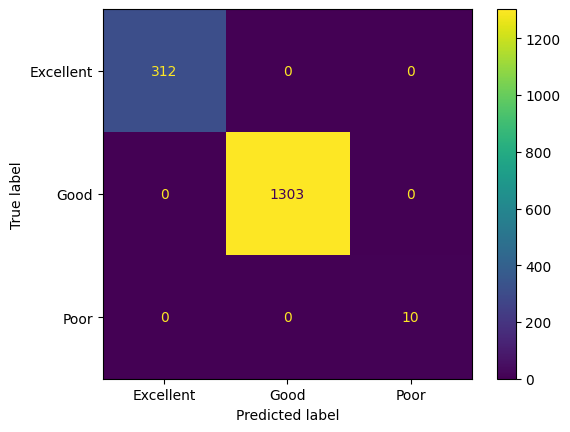

In [32]:
cm = confusion_matrix(y_test, predict, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

### Accuracy

In [33]:
ac = accuracy_score(predict, y_test)
print('Accuracy is:', ac)

Accuracy is: 1.0


### Classification

Report, precision, recall, f1-score, support, accuracy

In [34]:
from sklearn.metrics import classification_report
labels = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, predict, target_names=labels))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00       312
     class 1       1.00      1.00      1.00      1303
     class 2       1.00      1.00      1.00        10

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



### The out of bag error, OOB

In [35]:
print('The out of bag error is', model.oob_score_)

The out of bag error is 1.0


### Feature Ranking

In [36]:
''' First extracting feature rankings and standardizing '''
# Get importances
importances = model.feature_importances_
# Standardize Importances
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
feature_names = list(x_train.columns)
features_dict = {key: val for key, val in zip(feature_names, std)}
feature_rankings = {k: v for k, v in sorted(features_dict.items(), key=lambda item: item[1], reverse=True)}
feature_rankings_list = list(feature_rankings.items())

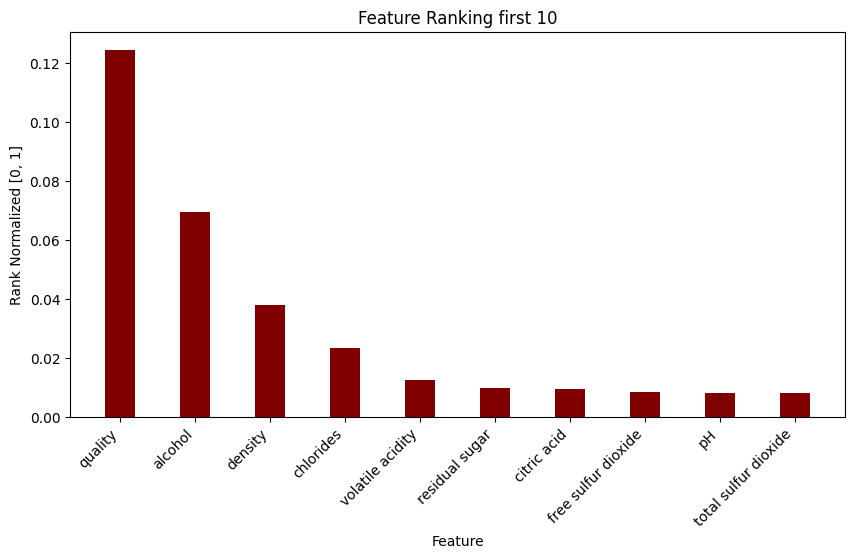

In [37]:
import matplotlib.pyplot as plt

# number of features to compare

n = 10
target_features = feature_rankings_list[:n]
feature_names = [tup[0] for tup in target_features]
feature_values = [tup[1] for tup in target_features]

fig = plt.figure(figsize = (10, 5))

plt.xticks(rotation=45, ha='right')

# creating the bar plot
plt.bar(feature_names, feature_values, color ='maroon',
        width = 0.4)

plt.xlabel('Feature')
plt.ylabel('Rank Normalized [0, 1]')
plt.title(f'Feature Ranking first {n}')

plt.show()
           